In [61]:
#pandas and numpy package
import pandas as pd
import numpy as np

In [14]:
#reading match_analysis
df_match=pd.read_csv('C:/Users/Mayank Gupta/Desktop/IPL_analysis/Datasets/match_data.csv') 

In [15]:
#All the matches RCB played
df_rcb=df_match[df_match.team1_id=='RCB'] 
df_rcb_2=df_match[df_match.team2_id=='RCB']
df_rcb_matches=pd.concat([df_rcb,df_rcb_2]) #All the matches RCB played 

In [16]:
#to find the season wise wins of RCB
import sys
wins=[]
season=[]
for i in range(2008,2018):
    seasonwisewins=df_rcb_matches[df_rcb_matches.season==i]
    season.append(i)
    wins.append(len(seasonwisewins[df_rcb_matches.winner=='RCB']))

C:\Users\Mayank Gupta\AppData\Local\Continuum\Anaconds\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [17]:
dictionary_rcb_wins = dict(zip(season, wins)) #dictionary containing season and number wins

In [18]:
dictionary_rcb_wins

{2008: 4,
 2009: 9,
 2010: 8,
 2011: 10,
 2012: 8,
 2013: 9,
 2014: 5,
 2015: 8,
 2016: 9,
 2017: 3}

In [19]:
season=list(map(str,season)) #convert list of int to list of strings

<b>Clearly we can see that 2009,2011 and 2016 were the best seasons for RCB let us see why this was the case. We will start season by season and later see why it has failed badly from previous 2 seasons. </b>

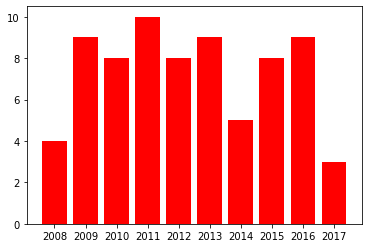

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

names = list(dictionary_rcb_wins.keys())
values = list(dictionary_rcb_wins.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(dictionary_rcb_wins)),values,tick_label=names,color='red')
plt.show()

In [36]:
# Standard plotly imports
import chart_studio 
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode,plot
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)


In [37]:
df['wins'].iplot()

In [39]:
data = [go.Bar(
            x=names,
            y=values,
            marker=dict(color='#FF0000'), 
            name="Wins",
            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Year', titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        )),title='Season Wise Wins',   
         yaxis=dict(
        title='Number Of Wins',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='style-bar')

<b>Let us see RCB performance in and away from home Did it had a huge impact on their success Let us Find Out..</b>

In [41]:
wins=df_rcb_matches[df_rcb_matches.winner=='RCB']  
wins_At_home=wins[wins.city=='Bangalore']
count_home=len(wins_At_home)
wins_away=wins[wins.city!='Bangalore']
count_away=len(wins_away)
labels = ['Home Wins','Away Wins']
values = [count_home,count_away]
trace = go.Pie(labels=labels, values=values)
iplot([trace], filename='basic_pie_chart',show_link=False)

<b>Of all the matches RCB won there 59% wins were from away games <br>Now Let us see toss dependency on RCB success</b>

In [43]:
toss_wins_match=wins[wins.toss_winner=='RCB']
len(toss_wins_match)


35

In [44]:
loss_wins_match=wins[wins.toss_winner!='RCB']
len(loss_wins_match)

38

<b>Toss doesnot matter much for RCB. They have won 35 matches when the won the toss and 38 while losing the toss</b>

In [45]:
matches_won_batting_first=wins[wins.win_by_runs>0]
batting_first=len(matches_won_batting_first)
matches_won_chasing=wins[wins.win_by_wickets>0]
batting_second=len(matches_won_chasing)

In [46]:
print(batting_first)
print(batting_second)

30
42


<b>So RCB has won 30 matches batting first and 42 matches while chasing. Let us see what happened in last 4 seasons</b>

In [47]:
wins_season_2014=wins[wins.season==2014]
wins_season_2015=wins[wins.season==2015]
wins_season_2016=wins[wins.season==2016]
wins_season_2017=wins[wins.season==2017]
wins_last_4_seasons=pd.concat([wins_season_2014,wins_season_2015,wins_season_2016,wins_season_2017])

In [48]:
matches_won_batting_first=wins_last_4_seasons[wins_last_4_seasons.win_by_runs>0]
batting_first=len(matches_won_batting_first)
matches_won_chasing=wins_last_4_seasons[wins_last_4_seasons.win_by_wickets>0]
batting_second=len(matches_won_chasing)

In [49]:
print(batting_first)
print(batting_second)

12
13


<b>In last four seasons RCB has won 13 matches while chasing and 12 while batting first. So batting first or second didnot matter much in RCB success</b>

In [50]:
man_of_the_match=wins_last_4_seasons['player_of_match'].value_counts()

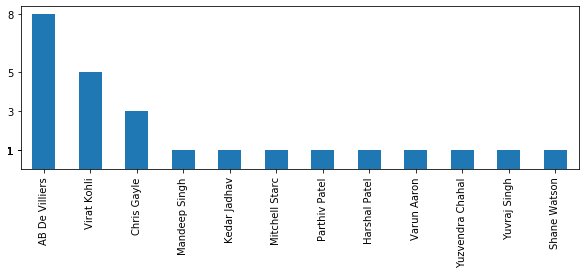

In [51]:
man_of_the_match.plot.bar(figsize=(10,3),xticks=man_of_the_match,yticks=man_of_the_match)
plt.show()

In [52]:
man_of_the_match_overall=wins['player_of_match'].value_counts()

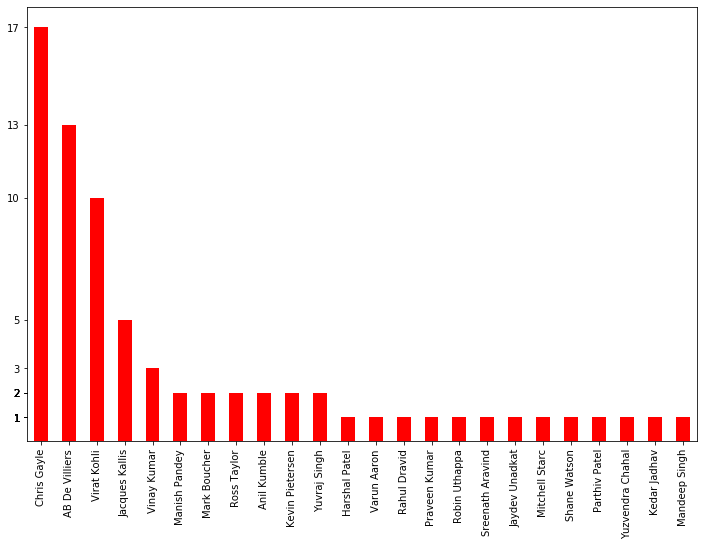

In [55]:
man_of_the_match_overall.plot.bar(figsize=(12,8),xticks=man_of_the_match_overall,yticks=man_of_the_match_overall,color='red')
plt.show()

<b>The Previous two graphs shows RCB dependency on their Three batsman Chris Gayle, AB Devilleres and Virat Kohli. Other than them there were not too many match winners specially in last 4 seasons and after dropping Gayle they are left with two. You cannot win games with just two players.</b>

In [56]:
wins['team1_id'].unique()

array(['RCB', 'MI', 'DC', 'KKR', 'CSK', 'DD', 'KXI', 'RR', 'KTK', 'PW',
       'SRH', 'RPS', 'GL'], dtype=object)

In [57]:
csk_loss=len(wins[(wins.team1_id =='CSK') | (wins.team2_id=='CSK')]) 
mi_loss=len(wins[(wins.team1_id =='MI') | (wins.team2_id=='MI')]) 
kxi_loss=len(wins[(wins.team1_id =='KXI') | (wins.team2_id=='KXI')])
dd_loss=len(wins[(wins.team1_id =='DD') | (wins.team2_id=='DD')])
rr_loss=len(wins[(wins.team1_id =='RR') | (wins.team2_id=='RR')])
dc_loss=len(wins[(wins.team1_id =='DC') | (wins.team2_id=='DC')])
kkr_loss=len(wins[(wins.team1_id =='KKR') | (wins.team2_id=='KKR')])
srh_loss=len(wins[(wins.team1_id =='SRH') | (wins.team2_id=='SRH')])
teams_loss=[csk_loss,mi_loss,kxi_loss,dd_loss,rr_loss,dc_loss,kkr_loss,srh_loss]
labelss=['CSK','MI','KXI','DD','RR','DC','KKR','SRH']

In [58]:
data = [go.Bar(
            x=labelss,
            y=teams_loss,
            marker=dict(color=['#F9F606','#0983FC','#FB5304','#4404FB','#FB04D9','#0939FA','#000000','#FA9B09']), 
            name="Wins",            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Teams', titlefont=dict(
            size=16,
        
        )),title='RCB vs Different teams',   
         yaxis=dict(
        title='Number Of Wins',
        titlefont=dict(
            size=16
        ),
        tickfont=dict(
            size=14
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='style-bar',show_link=False)

<b>It would be better if instead of number of wins we used win percentage</b>

In [62]:
csk_matches=len(df_rcb_matches[(df_rcb_matches.team1_id =='CSK') | (df_rcb_matches.team2_id=='CSK')]) 
mi_matches=len(df_rcb_matches[(df_rcb_matches.team1_id =='MI') | (df_rcb_matches.team2_id=='MI')]) 
kxi_matches=len(df_rcb_matches[(df_rcb_matches.team1_id =='KXI') | (df_rcb_matches.team2_id=='KXI')])
dd_matches=len(df_rcb_matches[(df_rcb_matches.team1_id =='DD') | (df_rcb_matches.team2_id=='DD')])
rr_matches=len(df_rcb_matches[(df_rcb_matches.team1_id =='RR') | (df_rcb_matches.team2_id=='RR')])
dc_matches=len(df_rcb_matches[(df_rcb_matches.team1_id =='DC') | (df_rcb_matches.team2_id=='DC')])
kkr_matches=len(df_rcb_matches[(df_rcb_matches.team1_id =='KKR') | (df_rcb_matches.team2_id=='KKR')])
srh_matches=len(df_rcb_matches[(df_rcb_matches.team1_id =='SRH') | (df_rcb_matches.team2_id=='SRH')])
teams_matches=[csk_matches,mi_matches,kxi_matches,dd_matches,rr_matches,dc_matches,kkr_matches,srh_matches]
labelss=['CSK','MI','KXI','DD','RR','DC','KKR','SRH']

In [63]:
res_list = [teams_loss[i]/teams_matches[i]*100 for i in range(len(teams_matches))]

In [65]:
data = [go.Bar(
            x=labelss,
            y=res_list,
            marker=dict(color=['#F9F606','#0983FC','#FB5304','#4404FB','#FB04D9','#0939FA','#000000','#FA9B09']), 
            name="Wins",            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Teams', titlefont=dict(
            size=16,
        
        )),title='RCB vs Different teams',   
         yaxis=dict(
        title='Win percentage',
        titlefont=dict(
            size=16
        ),
        tickfont=dict(
            size=14
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='style-bar',show_link=False)

<b>This gives a better insight of RCB performance against different teams we can see RCB has won 62 % games against DD and have lowest success rate against CSK</b>